<a href="https://colab.research.google.com/github/guilhermelaviola/IMDbMovieListAnalysis/blob/main/IMDbWatchlistStudyFiltered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')
drive.mount('/content/drive')

<ipython-input-1-921de9e8a408>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Mounted at /content/drive


In [2]:
# Setting the search parameters:
filename = 'imdb.xlsx'
search_path = '/content/drive/My Drive/Datasets/Movies'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    df = pd.read_excel(file)

# **Basic information of the dataset**

In [3]:
# Importing the dataset and displying the last 10 rows:
imdb = pd.ExcelFile(file)
wl = pd.read_excel(imdb, 'Watchlist')
wl.tail()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status
566,2024-09-20,True Believer,Movie,6.7,108.0,1989,"Crime, Drama, Mystery",5568,1989-02-17 00:00:00,Joseph Ruben,NaN
567,2024-09-22,Desert Heat,Movie,5.2,95.0,1999,"Action, Comedy, Drama, Romance",10865,1999-09-25 00:00:00,John G. Avildsen,NaN
568,2024-09-24,Syriana,Movie,6.9,128.0,2005,"Drama, Thriller",135170,2005-12-09 00:00:00,Stephen Gaghan,NaN
569,2024-09-25,Dead Again,Movie,6.8,107.0,1991,"Crime, Drama, Mystery, Thriller",30712,1991-08-23 00:00:00,Kenneth Branagh,NaN
570,2024-09-28,Gladiator II,Movie,NaN,150.0,2024,"Action, Adventure, Drama",0,2024-11-22 00:00:00,Ridley Scott,NaN


In [4]:
# Filtering the dataset by Status = 'To watch with mom':
to_watch_with_mom = wl[(wl['Status'] == 'To watch with mom')]

In [5]:
# Displaying the number of rows and columns in the filtered dataset:
to_watch_with_mom.shape

(267, 11)

In [6]:
# Displaying the datatypes of each column:
to_watch_with_mom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 0 to 552
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         267 non-null    datetime64[ns]
 1   Title           267 non-null    object        
 2   Title Type      267 non-null    object        
 3   IMDb Rating     267 non-null    float64       
 4   Runtime (mins)  267 non-null    float64       
 5   Year            267 non-null    int64         
 6   Genres          267 non-null    object        
 7   Num Votes       267 non-null    int64         
 8   Release Date    267 non-null    object        
 9   Directors       266 non-null    object        
 10  Status          267 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 25.0+ KB


In [7]:
# Displaying statistical data of the numerical data present in the filtered dataset:
to_watch_with_mom.describe()

,Created,IMDb Rating,Runtime (mins),Year,Num Votes
count,267,267.000000,267.000000,267.000000,2.670000e+02
mean,2022-12-14 22:06:44.494382080,6.800375,121.868914,1988.026217,7.137326e+04
min,2020-04-29 00:00:00,0.000000,71.000000,1940.000000,0.000000e+00
25%,2022-02-28 00:00:00,6.300000,104.000000,1974.000000,6.003000e+03
50%,2022-11-05 00:00:00,6.800000,114.000000,1991.000000,2.054700e+04
75%,2023-11-03 00:00:00,7.300000,126.500000,2000.000000,6.201200e+04
max,2024-07-31 00:00:00,9.000000,317.000000,2024.000000,1.489711e+06
std,NaN,0.865439,30.925597,18.685447,1.568691e+05


# **Basic column data plotting**

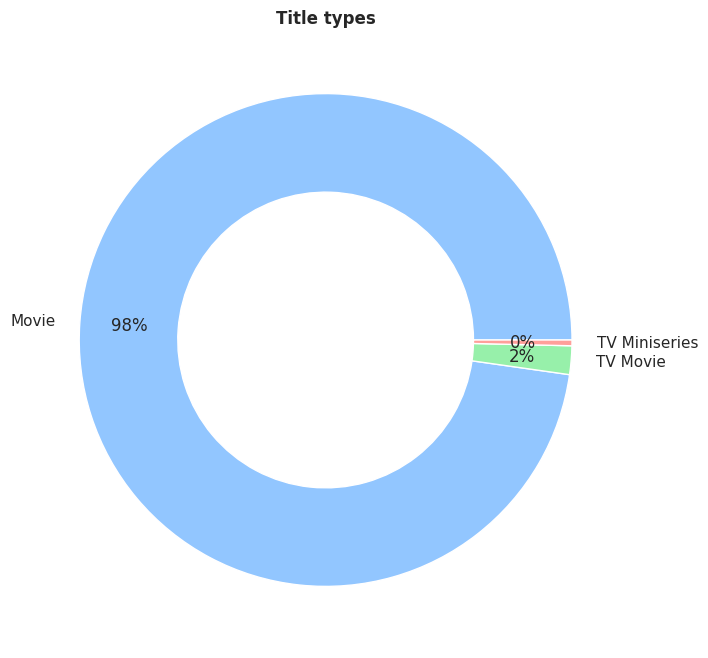

In [8]:
# Displaying the title types present in the filtered dataset:
to_watch_with_mom['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [9]:
# Creating a datetime object based on the dates from the filtered dataset:
to_watch_with_mom['Created'] = to_watch_with_mom['Created'].map(pd.to_datetime)
to_watch_with_mom['Day Created'] = to_watch_with_mom['Created'].apply(lambda x : x.day)
to_watch_with_mom['Month Created'] = to_watch_with_mom['Created'].apply(lambda x : x.month)
to_watch_with_mom['Year Created'] = to_watch_with_mom['Created'].apply(lambda x : x.year)
to_watch_with_mom['Weekday Created'] = to_watch_with_mom['Created'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column in the filtered dataset:
to_watch_with_mom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 0 to 552
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Created          267 non-null    datetime64[ns]
 1   Title            267 non-null    object        
 2   Title Type       267 non-null    object        
 3   IMDb Rating      267 non-null    float64       
 4   Runtime (mins)   267 non-null    float64       
 5   Year             267 non-null    int64         
 6   Genres           267 non-null    object        
 7   Num Votes        267 non-null    int64         
 8   Release Date     267 non-null    object        
 9   Directors        266 non-null    object        
 10  Status           267 non-null    object        
 11  Day Created      267 non-null    int64         
 12  Month Created    267 non-null    int64         
 13  Year Created     267 non-null    int64         
 14  Weekday Created  267 non-null    int64         

<ipython-input-9-624672dcd688>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Created'] = to_watch_with_mom['Created'].map(pd.to_datetime)
<ipython-input-9-624672dcd688>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Day Created'] = to_watch_with_mom['Created'].apply(lambda x : x.day)
<ipython-input-9-624672dcd688>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

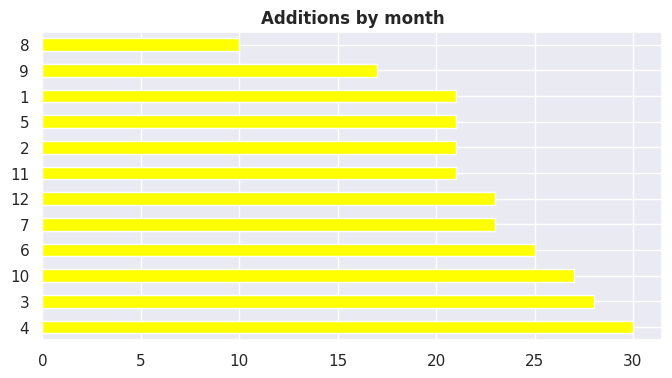

In [10]:
# Displaying the months with most and less additions:
to_watch_with_mom['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by month', fontweight = 'bold')
plt.show()

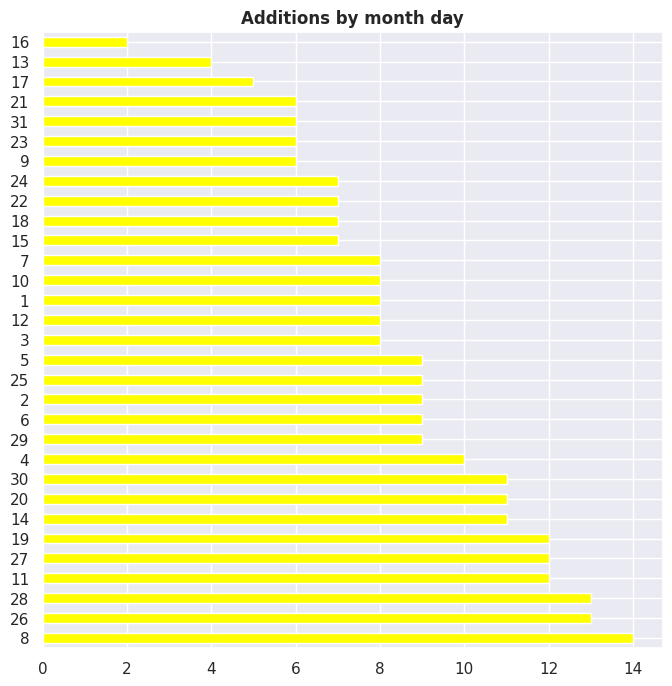

In [11]:
# Displaying the month days with most and less additions:
to_watch_with_mom['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Additions by month day', fontweight = 'bold')
plt.show()

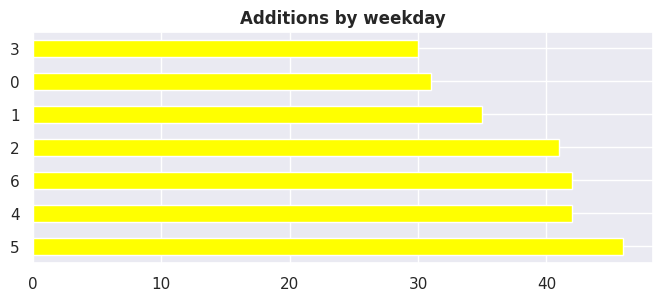

In [12]:
# Displaying the weekdays with most and less additions:
to_watch_with_mom['Weekday Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 3))
plt.ylabel(None)
plt.title('Additions by weekday', fontweight = 'bold')
plt.show()

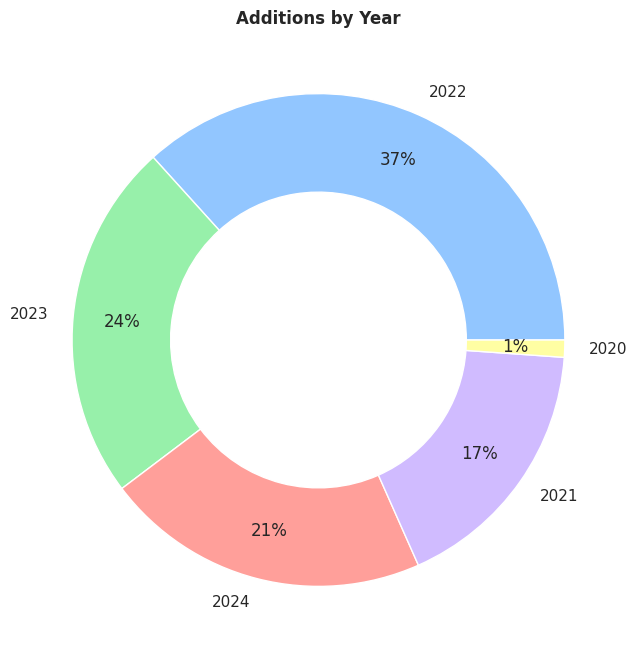

In [13]:
# Displaying the years with most and less additions:
to_watch_with_mom['Year Created'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Additions by Year', fontweight = 'bold')
plt.show()

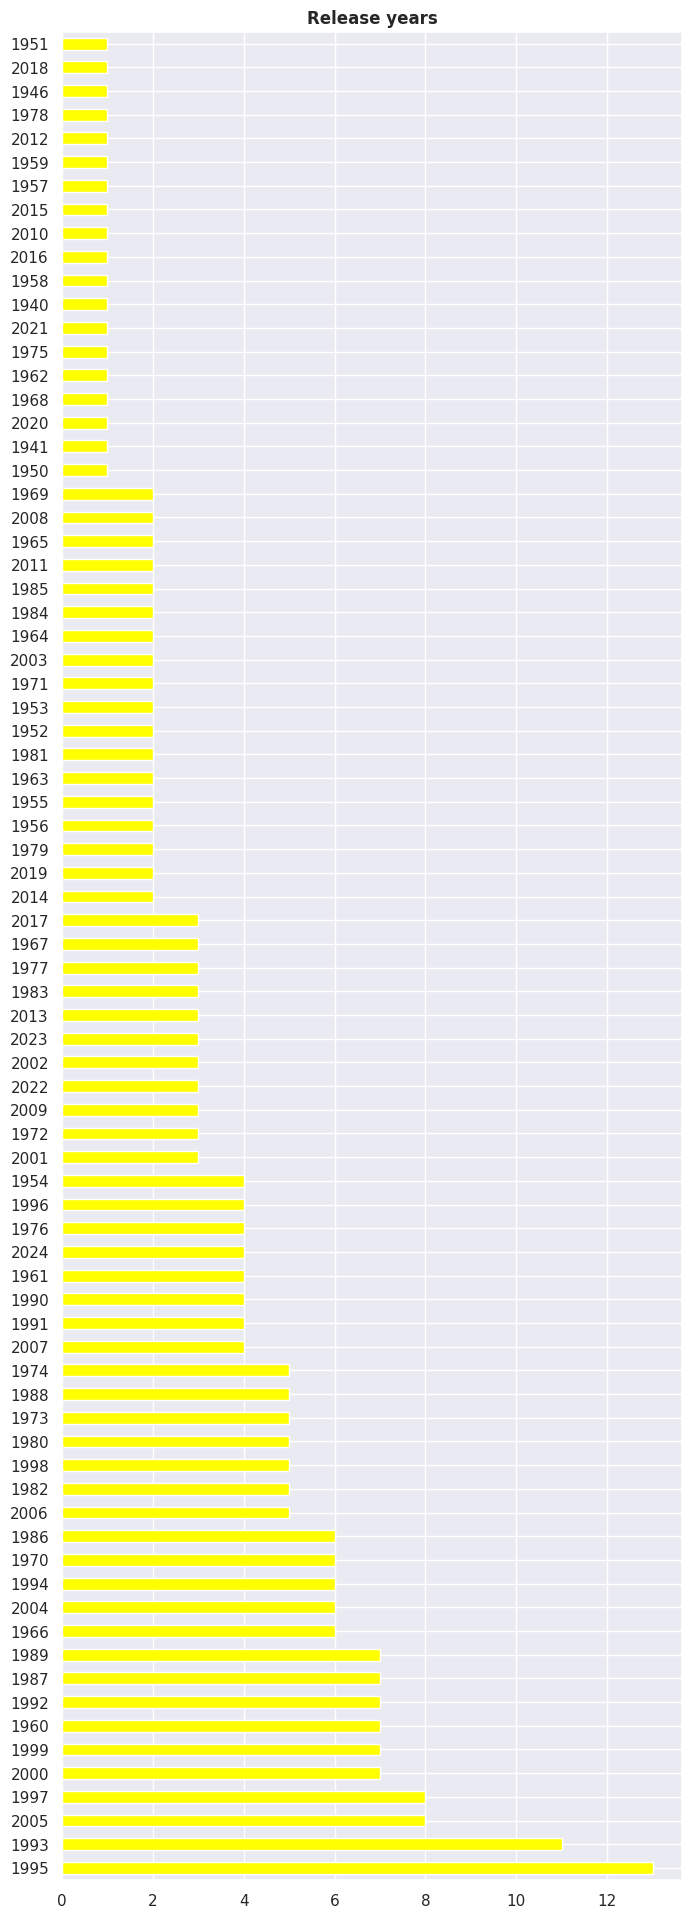

In [14]:
# Displaying distibution of release years in the dataset:
to_watch_with_mom['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release years', fontweight = 'bold')
plt.show()

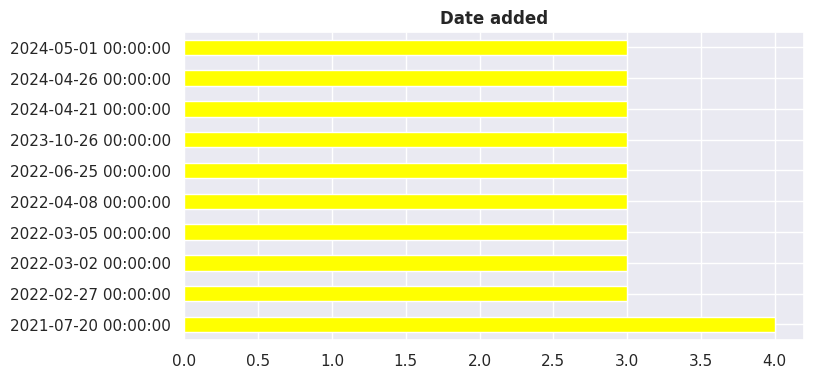

In [15]:
# Grouping by 'Date' and filtering groups with more than 2 entries only:
filtered_wl = to_watch_with_mom.groupby('Created').filter(lambda x: len(x) > 2)

# Displaying dates with most additions:
filtered_wl['Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Date added', fontweight = 'bold')
plt.show()

# **Applying functions to combine data from more than one column to generate new columns with analytics**

In [16]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Decade'] = to_watch_with_mom['Year'].apply(movies_by_decade)
to_watch_with_mom.head()

<ipython-input-16-33659bbd6e5a>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Decade'] = to_watch_with_mom['Year'].apply(movies_by_decade)


,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade
0,2020-04-29,The Great Dictator,Movie,8.4,125.0,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,To watch with mom,29,4,2020,2,1940s
14,2020-11-20,12 Angry Men,Movie,9.0,96.0,1957,"Crime, Drama",865430,1957-04-10 00:00:00,Sidney Lumet,To watch with mom,20,11,2020,4,1950s
15,2020-11-26,Gettysburg,Movie,7.6,271.0,1993,"Drama, History, War",31310,1993-10-06 00:00:00,Ron Maxwell,To watch with mom,26,11,2020,3,1990s
22,2021-02-08,Hanky Panky,Movie,5.6,110.0,1982,"Action, Comedy, Crime, Mystery, Thriller",3109,1982-06-04 00:00:00,Sidney Poitier,To watch with mom,8,2,2021,0,1980s
23,2021-02-11,Bohemian Rhapsody,Movie,7.9,134.0,2018,"Biography, Drama, Music",593056,2018-10-23 00:00:00,Bryan Singer,To watch with mom,11,2,2021,3,2010s


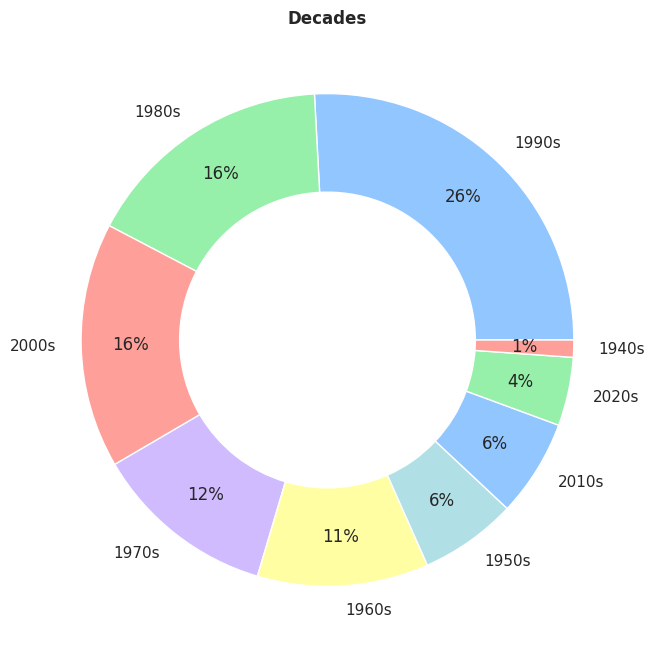

In [17]:
# Displaying the decades the movies are from:
to_watch_with_mom['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decades', fontweight = 'bold')
plt.show()

In [18]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Quality'] = to_watch_with_mom['IMDb Rating'].apply(imdb_rating)
to_watch_with_mom.head()

<ipython-input-18-c0a382964691>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Quality'] = to_watch_with_mom['IMDb Rating'].apply(imdb_rating)


,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality
0,2020-04-29,The Great Dictator,Movie,8.4,125.0,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,To watch with mom,29,4,2020,2,1940s,Amazing
14,2020-11-20,12 Angry Men,Movie,9.0,96.0,1957,"Crime, Drama",865430,1957-04-10 00:00:00,Sidney Lumet,To watch with mom,20,11,2020,4,1950s,Excellent
15,2020-11-26,Gettysburg,Movie,7.6,271.0,1993,"Drama, History, War",31310,1993-10-06 00:00:00,Ron Maxwell,To watch with mom,26,11,2020,3,1990s,Good
22,2021-02-08,Hanky Panky,Movie,5.6,110.0,1982,"Action, Comedy, Crime, Mystery, Thriller",3109,1982-06-04 00:00:00,Sidney Poitier,To watch with mom,8,2,2021,0,1980s,Regular
23,2021-02-11,Bohemian Rhapsody,Movie,7.9,134.0,2018,"Biography, Drama, Music",593056,2018-10-23 00:00:00,Bryan Singer,To watch with mom,11,2,2021,3,2010s,Good


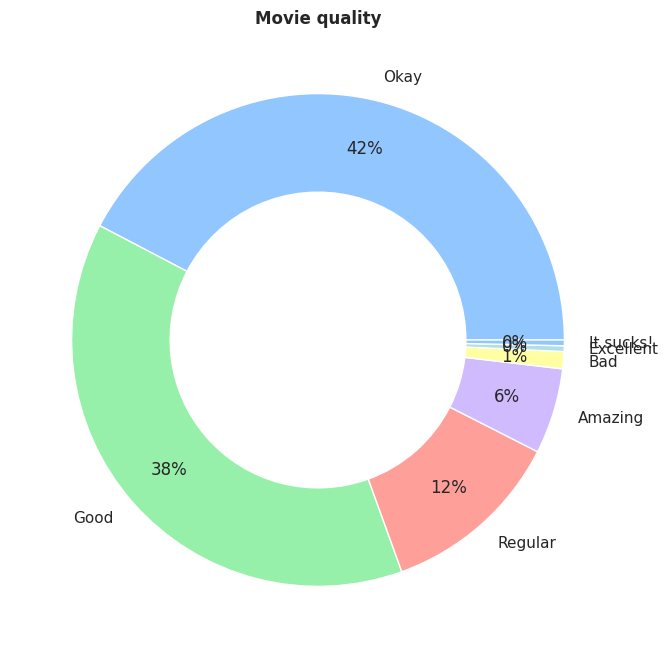

In [19]:
# Displaying the movie rating classification based on the algorithm above:
to_watch_with_mom['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [20]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes > 2000000:
    popularity = 'Over 2M votes'
  elif num_votes > 1000000 and num_votes <= 2000000:
    popularity = 'Over 1M votes'
  elif num_votes > 500000 and num_votes <= 1000000:
    popularity = 'Over 500k votes'
  elif num_votes > 250000 and num_votes <= 500000:
    popularity = 'Over 250k votes'
  else:
    popularity = 'Less than 250k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Movie popularity'] = to_watch_with_mom['Num Votes'].apply(movie_popularity)
to_watch_with_mom.head()

<ipython-input-20-cebfd6ec921e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Movie popularity'] = to_watch_with_mom['Num Votes'].apply(movie_popularity)


,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity
0,2020-04-29,The Great Dictator,Movie,8.4,125.0,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,To watch with mom,29,4,2020,2,1940s,Amazing,Less than 250k votes
14,2020-11-20,12 Angry Men,Movie,9.0,96.0,1957,"Crime, Drama",865430,1957-04-10 00:00:00,Sidney Lumet,To watch with mom,20,11,2020,4,1950s,Excellent,Over 500k votes
15,2020-11-26,Gettysburg,Movie,7.6,271.0,1993,"Drama, History, War",31310,1993-10-06 00:00:00,Ron Maxwell,To watch with mom,26,11,2020,3,1990s,Good,Less than 250k votes
22,2021-02-08,Hanky Panky,Movie,5.6,110.0,1982,"Action, Comedy, Crime, Mystery, Thriller",3109,1982-06-04 00:00:00,Sidney Poitier,To watch with mom,8,2,2021,0,1980s,Regular,Less than 250k votes
23,2021-02-11,Bohemian Rhapsody,Movie,7.9,134.0,2018,"Biography, Drama, Music",593056,2018-10-23 00:00:00,Bryan Singer,To watch with mom,11,2,2021,3,2010s,Good,Over 500k votes


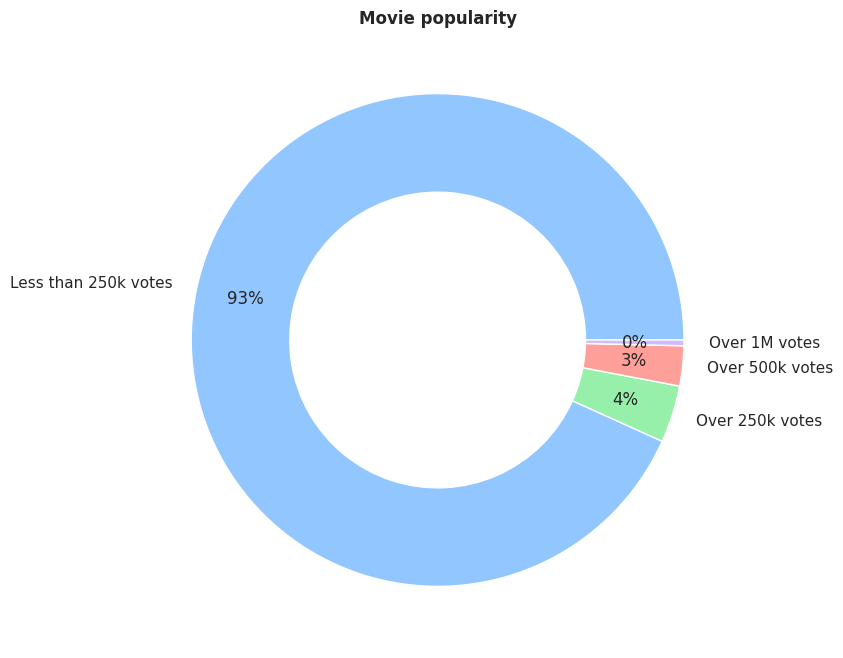

In [21]:
# Displaying the movie popularity based on the algorithm above:
to_watch_with_mom['Movie popularity'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [22]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Movie duration'] = to_watch_with_mom['Runtime (mins)'].apply(movie_duration)
to_watch_with_mom.head()

<ipython-input-22-5c4972d8f521>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Movie duration'] = to_watch_with_mom['Runtime (mins)'].apply(movie_duration)


,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration
0,2020-04-29,The Great Dictator,Movie,8.4,125.0,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,To watch with mom,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29
14,2020-11-20,12 Angry Men,Movie,9.0,96.0,1957,"Crime, Drama",865430,1957-04-10 00:00:00,Sidney Lumet,To watch with mom,20,11,2020,4,1950s,Excellent,Over 500k votes,Between 1h30 and 1h39
15,2020-11-26,Gettysburg,Movie,7.6,271.0,1993,"Drama, History, War",31310,1993-10-06 00:00:00,Ron Maxwell,To watch with mom,26,11,2020,3,1990s,Good,Less than 250k votes,Over 3h
22,2021-02-08,Hanky Panky,Movie,5.6,110.0,1982,"Action, Comedy, Crime, Mystery, Thriller",3109,1982-06-04 00:00:00,Sidney Poitier,To watch with mom,8,2,2021,0,1980s,Regular,Less than 250k votes,Between 1h40 and 1h59
23,2021-02-11,Bohemian Rhapsody,Movie,7.9,134.0,2018,"Biography, Drama, Music",593056,2018-10-23 00:00:00,Bryan Singer,To watch with mom,11,2,2021,3,2010s,Good,Over 500k votes,Between 2h and 2h29


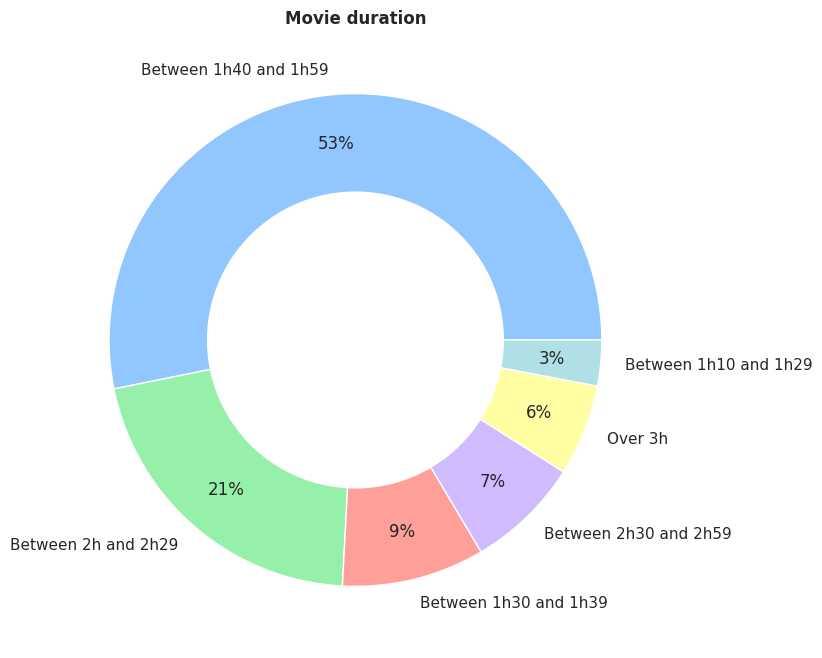

In [23]:
# Displaying the movie duration based on the algorithm above:
to_watch_with_mom['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [24]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Quartile Added'] = to_watch_with_mom['Month Created'].apply(year_quartile)
to_watch_with_mom.head()

<ipython-input-24-a88387f4e083>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Quartile Added'] = to_watch_with_mom['Month Created'].apply(year_quartile)


,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added
0,2020-04-29,The Great Dictator,Movie,8.4,125.0,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,To watch with mom,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29,Second
14,2020-11-20,12 Angry Men,Movie,9.0,96.0,1957,"Crime, Drama",865430,1957-04-10 00:00:00,Sidney Lumet,To watch with mom,20,11,2020,4,1950s,Excellent,Over 500k votes,Between 1h30 and 1h39,Fourth
15,2020-11-26,Gettysburg,Movie,7.6,271.0,1993,"Drama, History, War",31310,1993-10-06 00:00:00,Ron Maxwell,To watch with mom,26,11,2020,3,1990s,Good,Less than 250k votes,Over 3h,Fourth
22,2021-02-08,Hanky Panky,Movie,5.6,110.0,1982,"Action, Comedy, Crime, Mystery, Thriller",3109,1982-06-04 00:00:00,Sidney Poitier,To watch with mom,8,2,2021,0,1980s,Regular,Less than 250k votes,Between 1h40 and 1h59,First
23,2021-02-11,Bohemian Rhapsody,Movie,7.9,134.0,2018,"Biography, Drama, Music",593056,2018-10-23 00:00:00,Bryan Singer,To watch with mom,11,2,2021,3,2010s,Good,Over 500k votes,Between 2h and 2h29,First


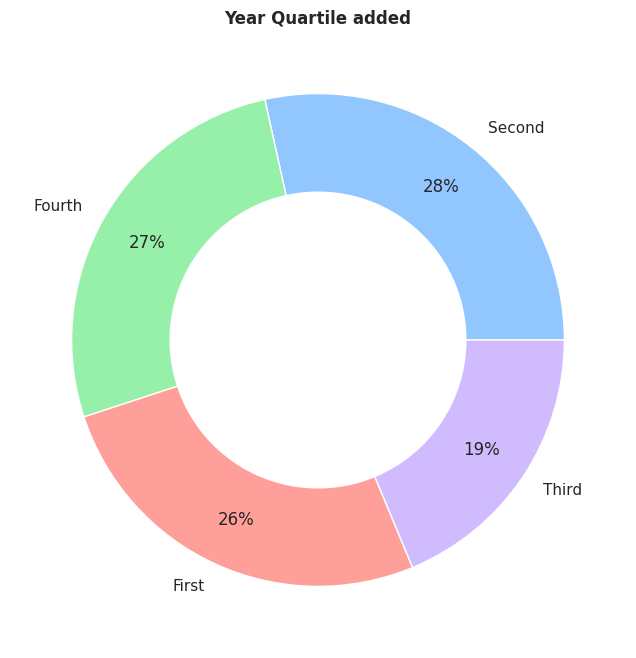

In [25]:
# Displaying the quartile the movie was added based on the algorithm above:
to_watch_with_mom['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [26]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Month Half Added'] = to_watch_with_mom['Day Created'].apply(month_half)
to_watch_with_mom.head()

<ipython-input-26-a7e4e0574ba8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Month Half Added'] = to_watch_with_mom['Day Created'].apply(month_half)


,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,...,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added,Month Half Added
0,2020-04-29,The Great Dictator,Movie,8.4,125.0,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,...,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29,Second,Second
14,2020-11-20,12 Angry Men,Movie,9.0,96.0,1957,"Crime, Drama",865430,1957-04-10 00:00:00,Sidney Lumet,...,20,11,2020,4,1950s,Excellent,Over 500k votes,Between 1h30 and 1h39,Fourth,Second
15,2020-11-26,Gettysburg,Movie,7.6,271.0,1993,"Drama, History, War",31310,1993-10-06 00:00:00,Ron Maxwell,...,26,11,2020,3,1990s,Good,Less than 250k votes,Over 3h,Fourth,Second
22,2021-02-08,Hanky Panky,Movie,5.6,110.0,1982,"Action, Comedy, Crime, Mystery, Thriller",3109,1982-06-04 00:00:00,Sidney Poitier,...,8,2,2021,0,1980s,Regular,Less than 250k votes,Between 1h40 and 1h59,First,First
23,2021-02-11,Bohemian Rhapsody,Movie,7.9,134.0,2018,"Biography, Drama, Music",593056,2018-10-23 00:00:00,Bryan Singer,...,11,2,2021,3,2010s,Good,Over 500k votes,Between 2h and 2h29,First,First


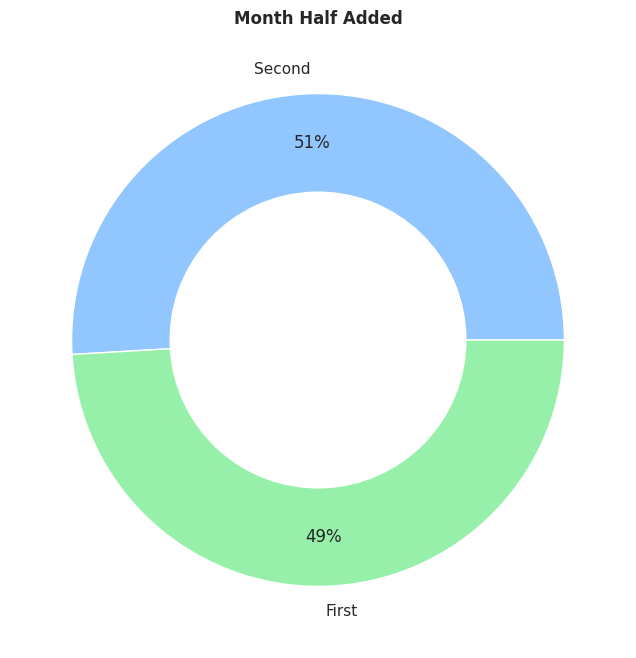

In [27]:
# Displaying the month half the movie was added based on the algorithm above:
to_watch_with_mom['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

# **The algorithm below was a bit more complicated to be implemented, as the movie genres are listed in the column separated by comma, so they had to be splitted and counted, and then their proportions were counted and plotted.**

In [28]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
to_watch_with_mom['Genres'] = to_watch_with_mom['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
to_watch_with_mom = to_watch_with_mom.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = to_watch_with_mom.index, columns = to_watch_with_mom['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-28-7f07c1d7911d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Genres'] = to_watch_with_mom['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [29]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         223    44
Adventure      225    42
Animation      266     1
Biography      229    38
Comedy         221    46
Crime          210    57
Documentary    266     1
Drama           38   229
Family         249    18
Fantasy        254    13
Film-Noir      264     3
History        240    27
Horror         257    10
Music          256    11
Musical        266     1
Mystery        254    13
Romance        206    61
Sci-Fi         249    18
Sport          247    20
Thriller       206    61
War            230    37
Western        250    17


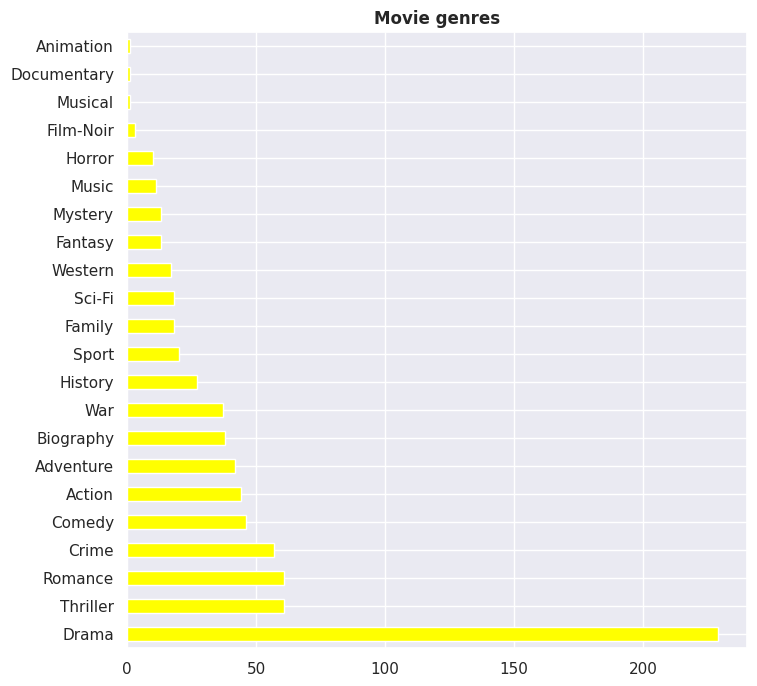

In [30]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [31]:
to_watch_with_mom = to_watch_with_mom[to_watch_with_mom['Directors'].apply(lambda x: isinstance(x, str))]

# Splitting the directors by comma and removing leading spaces:
to_watch_with_mom['Directors'] = to_watch_with_mom['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
to_watch_with_mom = to_watch_with_mom.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = to_watch_with_mom.index, columns = to_watch_with_mom['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-31-08fa5ebcc414>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Directors'] = to_watch_with_mom['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [32]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                      False  True
Adrian Lyne             264     0
Alejandro Monteverde    265     0
Alex Segal              265     0
Alfred Hitchcock        264     0
Andrew Erwin            265     0
...                     ...   ...
William Dear            265     0
William Friedkin        265     0
William Wyler           265     0
Wolfgang Petersen       265     0
Zoltan Korda            265     1

[238 rows x 2 columns]


In [33]:
# Grouping by 'Date' and filtering groups with more than 2 entries only:
# Displaying dates with most additions:
dir = final_directors_counts['True'].filter(lambda x: len(x) > 2)
dir['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 16))
plt.ylabel(None)
plt.title('Movie directors', fontweight = 'bold')
plt.show()

TypeError: Index(...) must be called with a collection of some kind, <function <lambda> at 0x7c53708dbd90> was passed